In [1]:
import os, sys, json
import numpy as np
import matplotlib.pyplot as plt

ROOT = r"C:\Users\ADMIN\Desktop\NDM_Project"
sys.path.append(os.path.join(ROOT, "src"))

from dataio import load_splits_json, iter_segments_from_record
from spectrogram import make_spectrogram

print("ROOT =", ROOT)


ROOT = C:\Users\ADMIN\Desktop\NDM_Project


In [2]:
# Load split + config spectrogram
records_map, splits, meta = load_splits_json(ROOT, r"data\splits\cwru_splits.json")

cfg_path = os.path.join(ROOT, "configs", "spectrogram.json")
with open(cfg_path, "r", encoding="utf-8") as f:
    spec_cfg = json.load(f)

print("split sizes:", {k: len(v) for k, v in splits.items()})
print("spectrogram config:", spec_cfg)


split sizes: {'train': 80, 'val': 10, 'test': 10}
spectrogram config: {'window_type': 'hamming', 'win_length': 512, 'hop_length': 256, 'n_fft': 512, 'use_mel': True, 'mel_bins': 64, 'fmin': 0.0, 'fmax': None, 'power': 2.0, 'log_eps': 1e-08, 'to_db': False}


In [3]:
# Chọn 1 record để preview (lấy record đầu tiên của train)
rid = splits["train"][0]
rec = records_map[rid]
print("record_id:", rid)
print("rec:", rec)

# lấy 1 segment đầu tiên
seg_iter = iter_segments_from_record(ROOT, rec, seg_len=4096, hop_len=4096, normalize=False)
seg = next(seg_iter)
print("segment length:", len(seg), "min/max:", float(seg.min()), float(seg.max()))


record_id: Normal_1.mat::chunk005
rec: {'relpath': 'data/raw/CWRU/normal_baseline/Normal_1.mat', 'label': 'H', 'start': 240000, 'end': 288000}
segment length: 4096 min/max: -0.22405292093753815 0.19442953169345856


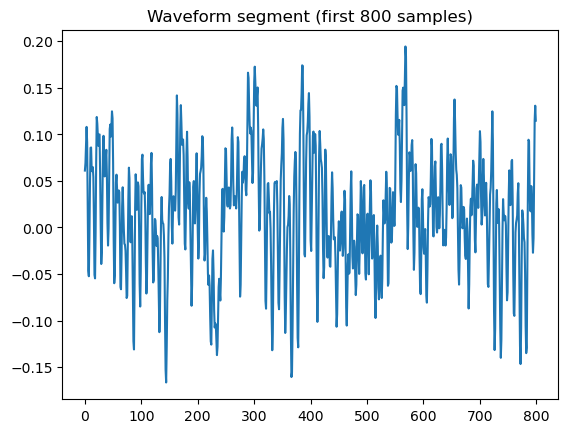

In [4]:
# Plot waveform
plt.figure()
plt.plot(seg[:800])
plt.title("Waveform segment (first 800 samples)")
plt.show()


In [5]:
FS = int(meta["fs"])

S_mel, m1 = make_spectrogram(
    seg, fs=FS,
    window_type=spec_cfg["window_type"],
    win_length=int(spec_cfg["win_length"]),
    hop_length=int(spec_cfg["hop_length"]),
    n_fft=int(spec_cfg["n_fft"]),
    use_mel=bool(spec_cfg["use_mel"]),
    n_mels=int(spec_cfg["mel_bins"]),
    fmin=float(spec_cfg["fmin"]),
    fmax=spec_cfg["fmax"],
    power=float(spec_cfg["power"]),
    log_eps=float(spec_cfg["log_eps"]),
    to_db=bool(spec_cfg["to_db"]),
)

print("S shape:", S_mel.shape)
print("S range:", float(S_mel.min()), float(S_mel.max()))


S shape: (64, 15)
S range: -18.42068099975586 -7.078487873077393


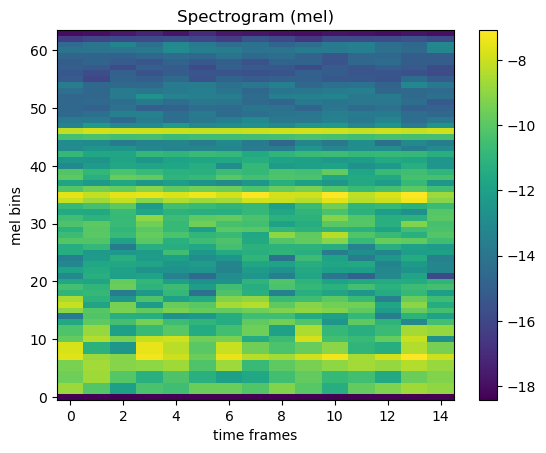

In [6]:
# Plot spectrogram (mel/log)
plt.figure()
plt.imshow(S_mel, aspect="auto", origin="lower")
plt.title("Spectrogram (mel)" if spec_cfg["use_mel"] else "Spectrogram (linear)")
plt.xlabel("time frames")
plt.ylabel("mel bins" if spec_cfg["use_mel"] else "freq bins")
plt.colorbar()
plt.show()


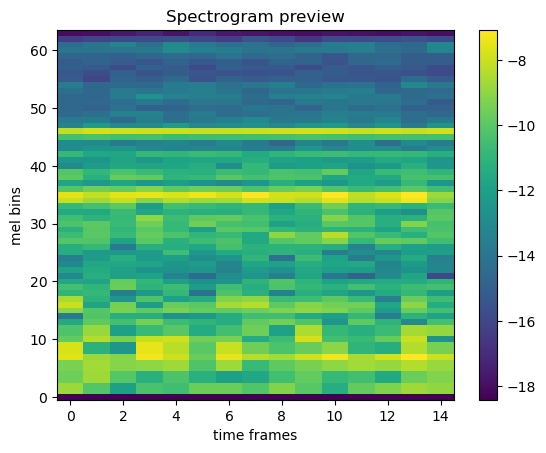

Saved: C:\Users\ADMIN\Desktop\NDM_Project\results\spectrogram_preview.png


In [7]:
out_png = os.path.join(ROOT, "results", "spectrogram_preview.png")
plt.figure()
plt.imshow(S_mel, aspect="auto", origin="lower")
plt.title("Spectrogram preview")
plt.xlabel("time frames")
plt.ylabel("mel bins" if spec_cfg["use_mel"] else "freq bins")
plt.colorbar()
plt.savefig(out_png, dpi=200, bbox_inches="tight")
plt.show()
print("Saved:", out_png)
